In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
data = pd.read_excel(r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx")
data

,Player,Nation,Pos,Squad,Age,MP,short Cmp%,medium Cmp%,long Cmp%,Ast,KP,Tkl,TklW,Blocks,Sh,Pass,Err,CrdY,CrdR,Fls,Crs,OG,AerWon,AerLost,CrdY + CrdR,AerTot,Gls
0,Lorenzo Venuti,it ITA,"DF,MF",Fiorentina,24,16,90.7,80.2,59.5,1,8,20,10,5,1,4,0,4,0,18,25,0,8,9,4,17,0
1,Francesco Acerbi,it ITA,DF,Lazio,31,36,92.7,93.1,75.2,2,8,59,29,40,27,13,1,4,0,26,26,0,56,32,4,88,2
2,Claud Adjapong,it ITA,DF,Hellas Verona,21,5,83.3,64.0,42.9,0,0,5,3,4,3,1,0,0,0,3,3,0,3,4,0,7,0
3,Ola Aina,ng NGA,DF,Torino,22,32,86.5,74.4,44.0,2,22,45,24,24,6,18,0,8,0,25,62,0,28,26,8,54,0
4,Bruno Alves,pt POR,DF,Parma,37,33,80.8,89.5,74.8,0,7,17,11,30,21,9,2,4,0,24,13,0,84,21,4,105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Ashley Young,eng ENG,DF,Inter,34,18,90.8,83.5,43.5,4,21,11,5,11,3,8,0,1,0,7,40,0,8,6,1,14,4
207,Cristián Zapata,co COL,DF,Genoa,32,20,93.0,93.9,81.5,0,6,23,17,29,17,12,0,4,0,16,1,1,58,29,4,87,1
208,Davide Zappacosta,it ITA,DF,Roma,27,9,92.7,83.2,52.2,1,7,7,3,3,1,2,1,0,0,2,23,0,0,4,0,4,0
209,Marvin Zeegelaar,nl NED,DF,Udinese,28,13,85.9,86.2,57.7,1,5,15,9,9,2,7,0,3,0,8,13,0,5,8,3,13,0


Questa è la lista completa dei difensori che erano iscritti al campionato di Serie A del 2019 con le rispettive statistiche legate alla loro anagrafe e alle loro prestazioni sul rettangolo di gioco. Tramite questi dati è stato possibile effettuare un'analisi approfondita dei calciatori.

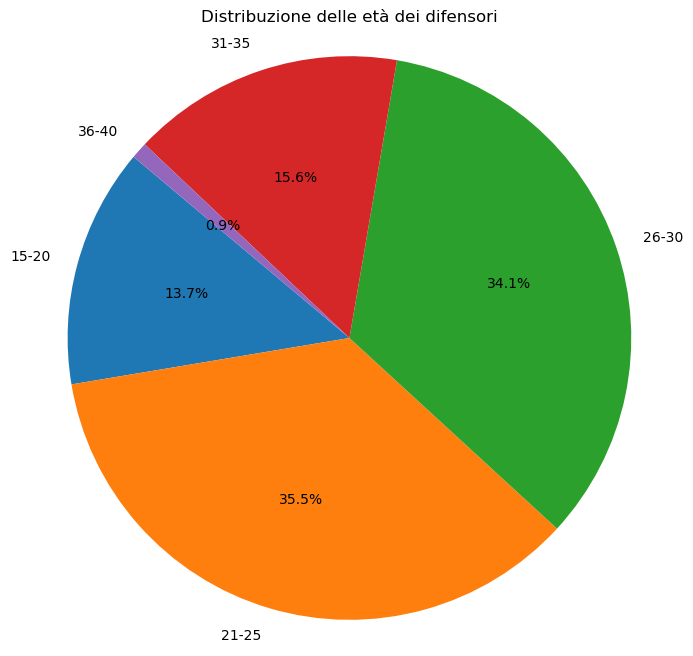

In [11]:
#diagramma a torta

eta = data['Age']

# Definisci le fasce di età
bins = [15, 20, 25, 30, 35, 40]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40']

# Categorizza le età nelle fasce specificate
eta_bins = pd.cut(eta, bins=bins, labels=labels, right=True, include_lowest=True)

# Conta il numero di difensori in ciascuna fascia
eta_counts = eta_bins.value_counts().sort_index()

# Crea il diagramma a torta
plt.figure(figsize=(8, 8))
plt.pie(eta_counts, labels=eta_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione delle età dei difensori')
plt.axis('equal')  # Per rendere il diagramma a torta circolare



# Aggiungi la legenda
#ax.legend([f"{label} - {int(count)} ({pct:.1f}%)" for label, count, pct in zip(eta_counts.index, eta_counts, 100*eta_counts/eta_counts.sum())], title="Fasce d'età", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Mostra il diagramma a torta
plt.show()


Il diagramma a torta permette di esprimere in maniera efficace la distribuzione delle fasce di età dei difensori all'interno del campionato. Si nota come ci sia una presenza maggiore di giocatori tra i 21-25 anni, il che mostra come sia un campionatorelativamente giovane.

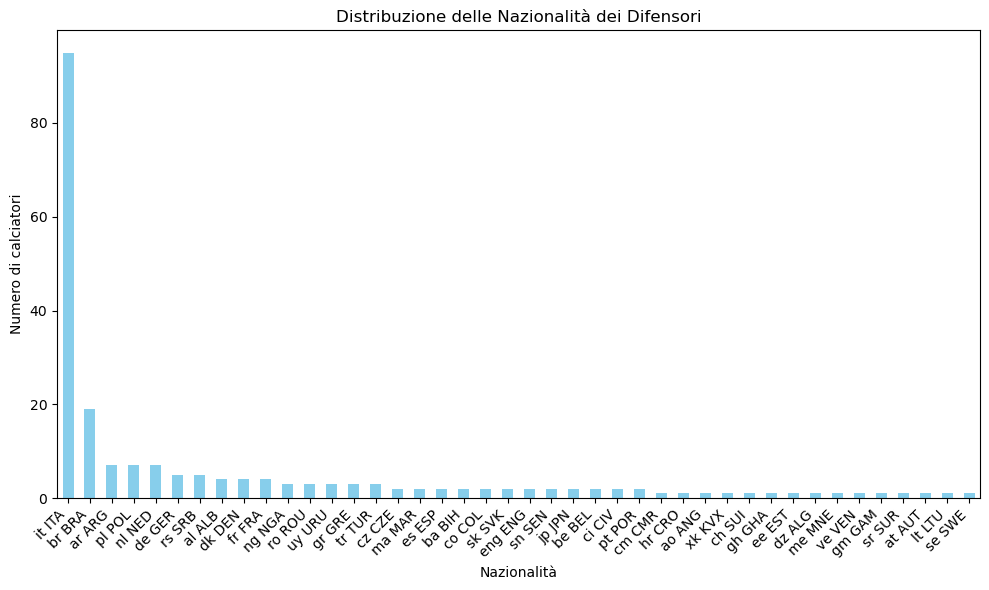

In [4]:
#istogramma nazionalità
nazionalita = data['Nation']

# Conta il numero di calciatori per ciascuna nazionalità
nazionalita_counts = nazionalita.value_counts()

# Crea l'istogramma
fig, ax = plt.subplots(figsize=(10, 6))
nazionalita_counts.plot(kind='bar', ax=ax, color='skyblue')

# Aggiungi i titoli e le etichette
ax.set_title('Distribuzione delle Nazionalità dei Difensori')
ax.set_xlabel('Nazionalità')
ax.set_ylabel('Numero di calciatori')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45, ha='right')

# Mostra il grafico
plt.tight_layout()
plt.show()

Una volta ricavati i dati relativi alla nazionalità di ogni difensore, è stato possibile stimare un istogramma a seconda del numero di calciatori provenienti da quella determinata nazione. Come d'aspettativa, la presenza di calciatori italiani risulta molto più numerosa rispetto alle altre, per via de fatto che l'analisi è stata proprio fatta riferendosi al campionato della nostra penisola.

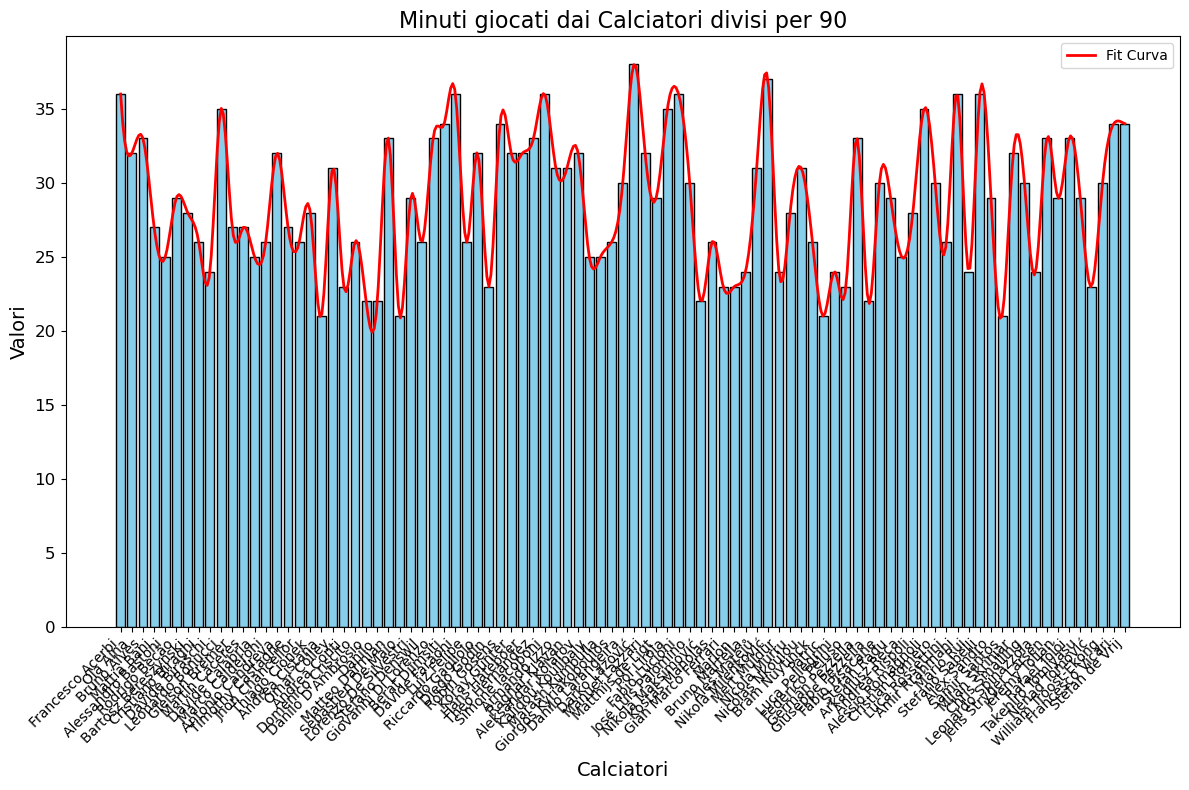

La media risulta: 28.747252747252748


In [13]:
import numpy as np
from scipy.interpolate import make_interp_spline

# Estrai i dati rilevanti
calciatori = data['Player']  
valori = data['MP']      

#Considero calciatori con più di 20 apparizioni

filtrato = valori > 20
calciatori_filtrati = calciatori[filtrato]
valori_filtrati = valori[filtrato]

# Crea un istogramma
plt.figure(figsize=(12, 8))
plt.bar(calciatori_filtrati, valori_filtrati, color='skyblue', edgecolor='black')

# Ottimizza il layout
plt.xlabel('Calciatori', fontsize=14)
plt.ylabel('Valori', fontsize=14)
plt.title('Minuti giocati dai Calciatori divisi per 90', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

# Aggiungi una curva di fit
x = np.arange(len(calciatori_filtrati))  # Converti l'indice dei calciatori filtrati in numerico
spl = make_interp_spline(x, valori_filtrati, k=3)  # Fit con spline
x_smooth = np.linspace(x.min(), x.max(), 500)  # Genera un range di valori lisciato
y_smooth = spl(x_smooth)

plt.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Fit Curva')

plt.tight_layout()
plt.legend()
plt.show()

media_valori_filtrati = valori_filtrati.mean()

# Mostra il risultato
print("La media risulta:", media_valori_filtrati)

Considerando i calciatori con almeno 20 apparizioni, è stato stimato il numero medio di minuti giocati a partita da parte di un difensore, e ciò risulterà utile soprattutto nel confronto nei diversi anni.

In [14]:
import numpy as np

def calculate_bins(data):
    n = len(data)
    sigma = np.std(data)
    IQR = np.percentile(data, 75) - np.percentile(data, 25)
    
    # Regola di Freedman-Diaconis
    bin_width_fd = 2 * IQR / (n ** (1/3))
    num_bin_fd = int(np.ceil((data.max() - data.min()) / bin_width_fd))
    
    return num_bin_fd

In questa cella definiamo una funzione che calcola il numero ottimale di bin per un istogramma utilizzando la regola di Freedman-Diaconis. Questa regola è utile per determinare la larghezza dei bin in modo da bilanciare la risoluzione del grafico e la variabilità dei dati. La funzione consist nel calcolare la deviazione standard e l'intervallo interquartile (IQR) dei dati, utilizzare la regola di Freedman-Diaconis per determinare la larghezza dei bin e calcolare il numero di bin necessari e lo restituisce.

In [7]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def plot_histogram(data, label, xlabel, ylabel, title):
    # Filtra i valori non finiti (inf, -inf) e rimuovi NaN
    data = data.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Calcola il numero di bin
    num_bins = calculate_bins(data)
    
    # Crea un istogramma dei dati
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(data, bins=num_bins, alpha=0.7, color='blue', edgecolor='black', label=label)
    
    # Funzione di fit (es. Gaussiana)
    def gauss(x, a, x0, sigma):
        return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
    
    # Calcola il centro dei bins per il fit
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Parametri iniziali per il fit gaussiano
    p0 = [max(counts), data.mean(), data.std()]
    
    # Fit dei dati con la funzione gaussiana
    try:
        popt, _ = curve_fit(gauss, bin_centers, counts, p0=p0, maxfev=2000)
        print("Parametri ottimali del fit:", popt)  # Stampa i parametri ottimali del fit
        # Sovrapposizione del fit sull'istogramma solo se il fit ha successo
        x_fit = np.linspace(bins[0], bins[-1], 100)
        y_fit = gauss(x_fit, *popt)
        plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')
    except RuntimeError as e:
        print(f"Errore durante il fitting: {e}")
    
    # Personalizzazione del grafico
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    # Mostra il grafico
    plt.show()
    
    # Calcola e mostra la media dei dati
    media_valori = data.mean()
    print(f"La media risulta: {media_valori}")

In questa cella, definiamo la funzione plot_histogram che crea un istogramma dei dati e sovrappone un fit gaussiano. La funzione:
Filtra i valori non finiti (inf, -inf) e rimuove i NaN dai dati.
Calcola il numero di bin utilizzando la funzione calculate_bins.
Crea un istogramma dei dati.
Definisce una funzione gaussiana per il fit.
Calcola i centri dei bin per il fit.
Esegue il fit gaussiano sui dati e sovrappone la curva gaussiana all'istogramma.
Personalizza il grafico con etichette, titolo, legenda e griglia.
Mostra il grafico.
Calcola e stampa la media dei dati.

In [8]:
# def utilizzato per creare le varie funzioni che verranno poi richiamate in seguito
def calcola_tackle(data): 
    # Calcola il rapporto tra i tackle riusciti e i tackle totali per ogni calciatore
    rapporti = data['TklW'] / data['Tkl']
    # Visualizza un istogramma dei rapporti dei tackle riusciti
    plot_histogram(rapporti, 'Tackles', 'Tackles riusciti', 'Numero di calciatori', 'Istogramma dei Tackles riusciti')

In questa cella, calcoliamo il rapporto tra i tackle riusciti (TklW) e i tackle totali (Tkl) per ogni calciatore. Questo rapporto fornisce un'indicazione dell'efficacia difensiva di ciascun giocatore. Utilizziamo la funzione plot_histogram per visualizzare i risultati in un istogramma, che mostra la distribuzione dei rapporti.

In [ ]:
def calcola_intercettazioni(data):
    # Estrae il numero di intercettazioni per ogni calciatore
    intercettazioni = data['Blocks']
    # Visualizza un istogramma delle intercettazioni
    plot_histogram(intercettazioni, 'Intercettazioni', 'Intercettazioni', 'Numero di calciatori', 'Istogramma delle intercettazioni')


Qui, ci concentriamo sul calcolo delle intercettazioni, rappresentate dalla colonna Blocks\. Le intercettazioni sono un'importante statistica difensiva, e visualizzarle in un istogramma ci permette di comprendere meglio la distribuzione delle prestazioni difensive tra i calciatori.

In [ ]:
def calcola_passaggi(data):
    # Calcola la precisione media dei passaggi combinando le percentuali di passaggi riusciti a breve, medio e lungo raggio
    rapporti = (data['short Cmp%'] + data['medium Cmp%'] + data['long Cmp%']) / 3
    # Visualizza un istogramma della precisione dei passaggi
    plot_histogram(rapporti, 'Precisione passaggi', 'Passaggi riusciti %', 'Numero di calciatori', 'Istogramma dei passaggi riusciti')


In questa cella, calcoliamo la precisione media dei passaggi combinando le percentuali di passaggi riusciti a breve, medio e lungo raggio. Questo approccio fornisce una visione complessiva dell'abilità di passaggio di un calciatore. L'istogramma risultante mostra come si distribuiscono queste percentuali tra i giocatori.

In [ ]:
def calcola_gol(data):
    # Estrae il numero di gol segnati per ogni calciatore
    gol = data['Gls']
    # Visualizza un istogramma dei gol segnati
    plot_histogram(gol, 'Gol', 'Gol', 'Numero di calciatori', 'Istogramma dei gol')


Qui, ci occupiamo del conteggio dei gol segnati da ciascun calciatore, utilizzando la colonna Gls\. Visualizzare il numero di gol in un istogramma ci aiuta a identificare i marcatori più prolifici e a comprendere la distribuzione delle prestazioni offensive.

In [ ]:
def calcola_assist(data):
    # Estrae il numero di presenze per ogni calciatore
    presenze = data['MP']
    # Estrae il numero di assist per ogni calciatore
    ast = data['Ast']
    # Filtra i dati per considerare solo i calciatori con almeno 5 presenze
    filtrati = data[presenze >= 5]
    ast = filtrati['Ast']
    # Visualizza un istogramma degli assist
    plot_histogram(ast, 'Assist', 'Assist', 'Numero di calciatori', 'Istogramma degli assist')


In questa cella, calcoliamo il numero di assist forniti dai calciatori. Filtriamo i dati per considerare solo i giocatori con almeno 5 presenze (MP), in modo da garantire che i risultati siano significativi. L'istogramma mostra la distribuzione degli assist tra i calciatori.

In [ ]:
def calcola_cartellini(data):
    # Somma i cartellini gialli e rossi per ogni calciatore
    cart = data['CrdY'] + data['CrdR']
    # Visualizza un istogramma dei cartellini
    plot_histogram(cart, 'Cartellini', 'Cartellini', 'Numero di calciatori', 'Istogramma dei cartellini')


Qui, sommiamo i cartellini gialli (CrdY) e rossi (CrdR) per ottenere il totale dei cartellini ricevuti da ciascun calciatore. Questo dato è utile per valutare la disciplina di un giocatore. L'istogramma risultante mostra come si distribuiscono i cartellini tra i calciatori.

In [ ]:
def calcola_key_passes(data):
    # Estrae il numero di presenze per ogni calciatore
    presenze = data['MP']
    # Estrae il numero di key passes per ogni calciatore
    kp = data['KP']
    # Filtra i dati per considerare solo i calciatori con almeno 5 presenze
    filtrati = data[presenze >= 5]
    kp = filtrati['KP']
    # Visualizza un istogramma dei key passes
    plot_histogram(kp, 'Key passes', 'Key passes', 'Numero di calciatori', 'Istogramma dei Key passes')


 In questa cella, calcoliamo il numero di key passes effettuati dai calciatori, filtrando per quelli con almeno 5 presenze. I key passes sono passaggi che portano a un tiro in porta, quindi sono un indicatore importante della creatività offensiva. L'istogramma mostra la distribuzione di questi passaggi tra i calciatori.

In [ ]:
def calcola_duelli_aerei(data):
    # Estrae il numero di duelli aerei vinti per ogni calciatore
    Aerw = data['AerWon']
    # Estrae il numero totale di duelli aerei per ogni calciatore
    Aertot = data['AerTot']
    # Calcola il rapporto tra i duelli aerei vinti e i duelli aerei totali per ogni calciatore
    rapporti = Aerw / Aertot
    # Visualizza un istogramma dei rapporti dei duelli aerei vinti
    plot_histogram(rapporti, 'Duelli aerei vinti', 'Duelli aerei vinti', 'Numero di calciatori', 'Istogramma dei duelli aerei vinti')

Infine, calcoliamo il rapporto tra i duelli aerei vinti (AerWon) e i duelli aerei totali (AerTot). Questo rapporto fornisce un'indicazione dell'efficacia di un calciatore nei duelli aerei. L'istogramma risultante mostra la distribuzione di questi rapporti tra i calciatori.

Parametri ottimali del fit: [33.8270232   0.58783223  0.10465382]


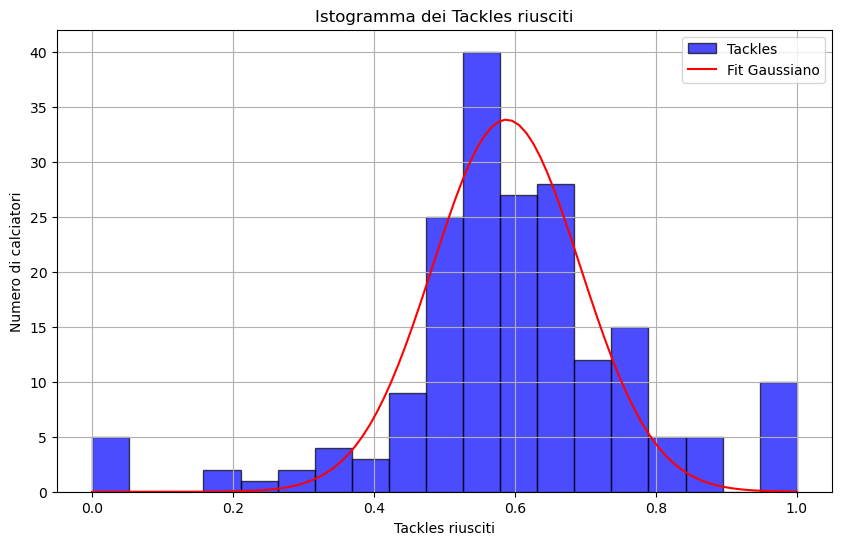

La media risulta: 0.5974324116135669
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


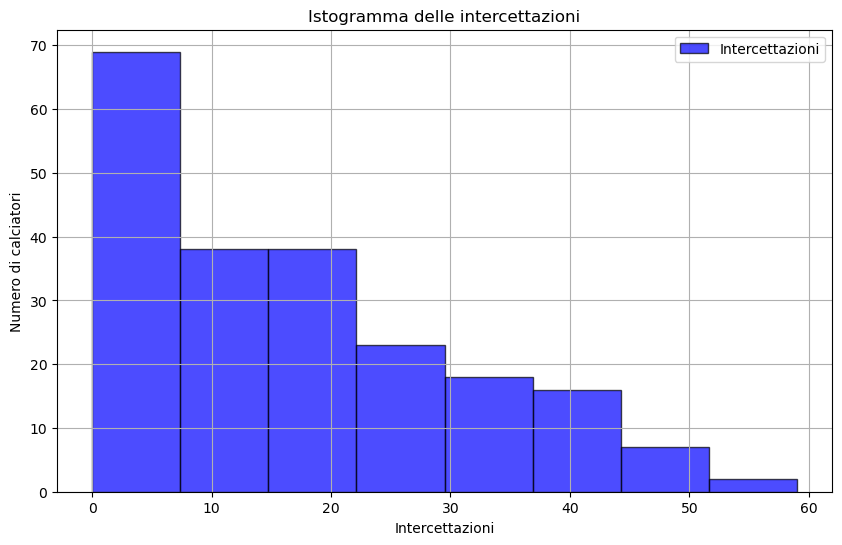

La media risulta: 16.990521327014218
Parametri ottimali del fit: [35.72970009 79.28146182  7.11910241]


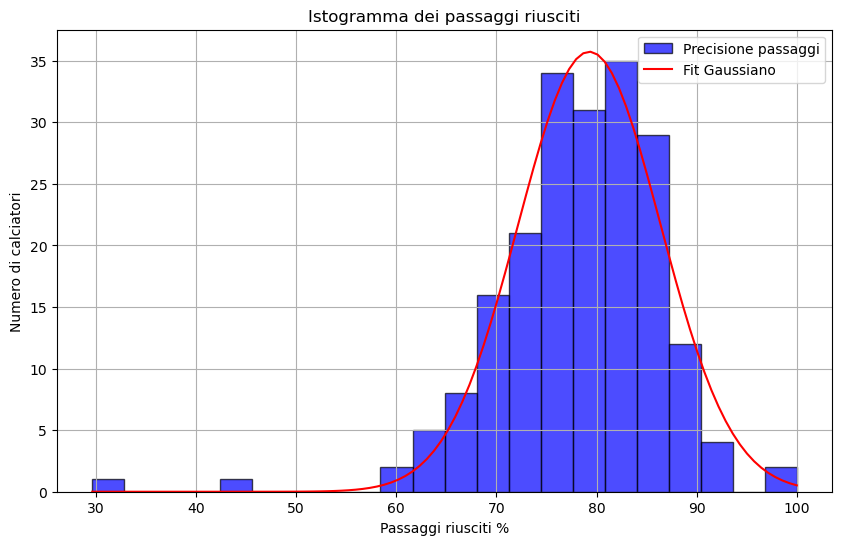

La media risulta: 78.26749585406301
Parametri ottimali del fit: [5.20866008e+02 4.08808423e-02 7.61252605e-02]


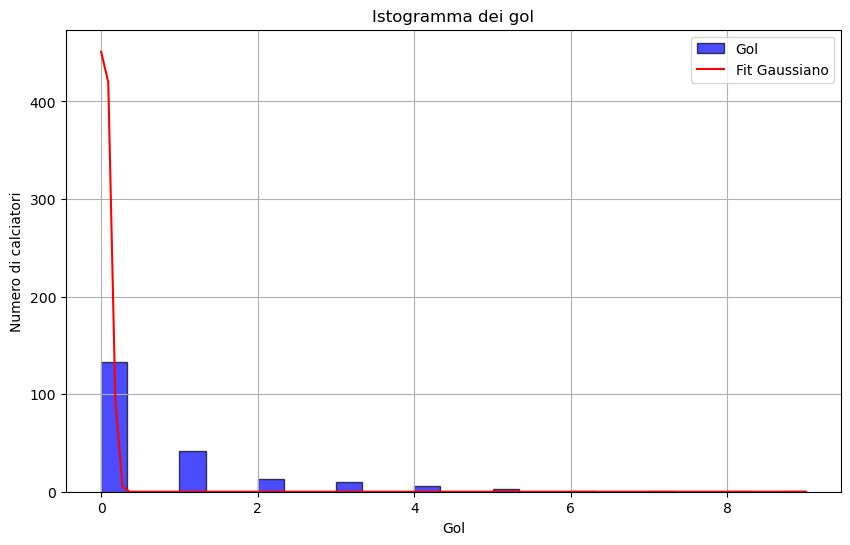

La media risulta: 0.7914691943127962
Parametri ottimali del fit: [ 4.25985886e+02 -1.03096533e-02  1.06969681e-01]


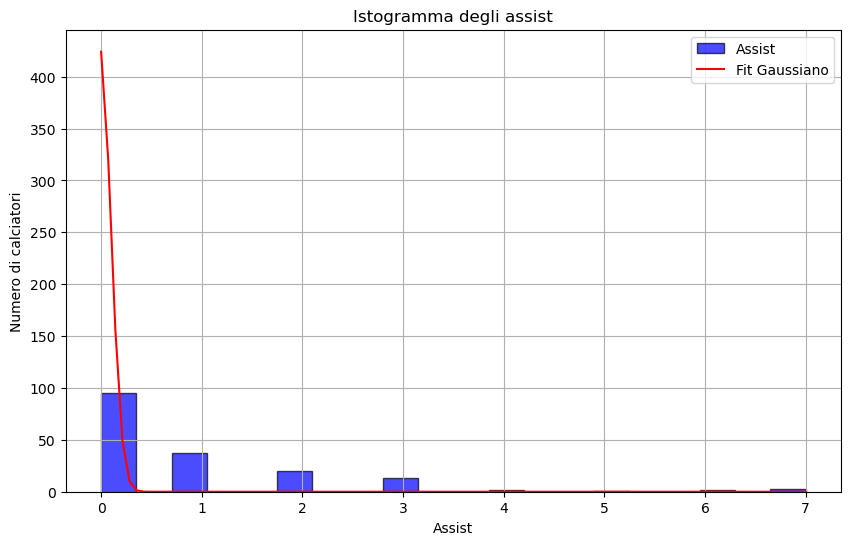

La media risulta: 0.9364161849710982
Parametri ottimali del fit: [183.31062552 -13.54516396   9.57696043]


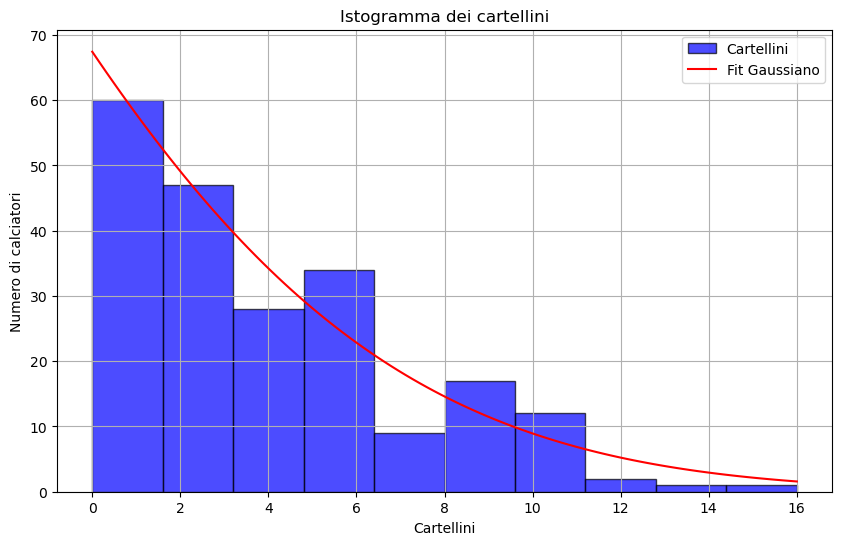

La media risulta: 3.862559241706161
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


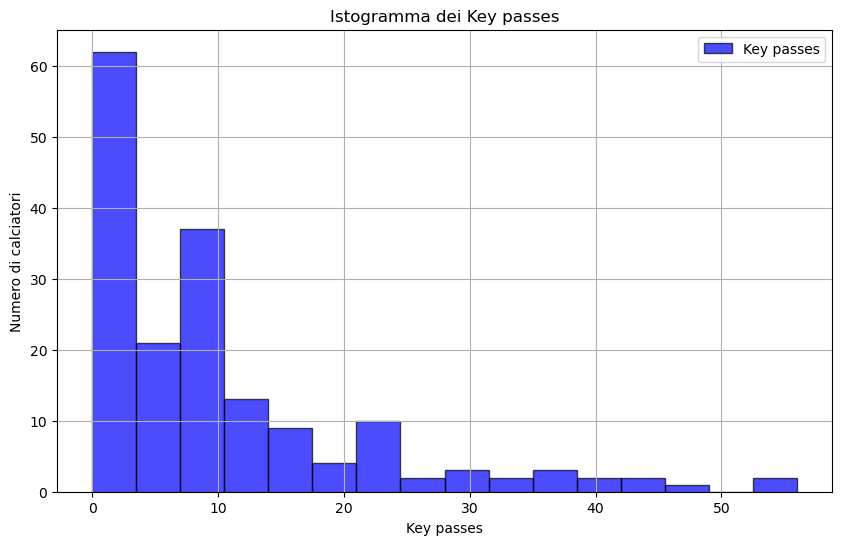

La media risulta: 9.959537572254336
Parametri ottimali del fit: [35.76654216  0.56507112  0.11563006]


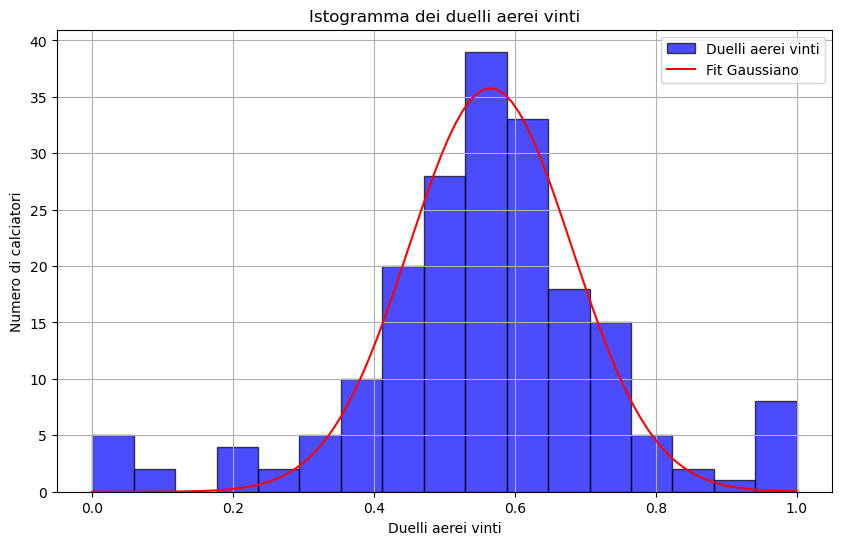

La media risulta: 0.5576496152186043


In [10]:
import pandas as pd

# Carica i dati
data = pd.read_excel(r"C:\Users\milan\OneDrive\Documenti\difensori 2019.xlsx")

# Calcola e visualizza i grafici
calcola_tackle(data)
calcola_intercettazioni(data)
calcola_passaggi(data)
calcola_gol(data)
calcola_assist(data)
calcola_cartellini(data)
calcola_key_passes(data)
calcola_duelli_aerei(data)

In questa cella, carichiamo i dati da un file Excel e utilizziamo le funzioni definite in precedenza per calcolare e visualizzare le statistiche per diverse metriche. Ogni funzione specifica (calcola_tackle, calcola_intercettazioni, calcola_passaggi, ecc.) calcola una particolare statistica e visualizza un istogramma con il fit gaussiano. Questo approccio modulare rende il codice facile da estendere e mantenere.